In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#CROSS VALIDATION
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")


In [4]:
dataset = pd.read_csv("e-ccomerce_data.csv")

dataset.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


## DESCRIPTIVE STATITISTICS

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
#Checking missin values

dataset.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
#STATISTICS SUMMARY

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


The statistics summary reveals some interesting features about my dataset.
Churn is a boolean, mean satisfaction score exceed that of complain score which seems to be a positive sign, maximum days 
last order of a customer is 46 days, one and half months

In [8]:
#GROUPING DATA INTO CATEGORICAL AND NUMERICAL

# Select numerical columns
numerical = dataset.select_dtypes(include=['int', 'float'])

# Select categorical columns
categorical = dataset.select_dtypes(exclude=["int", "float"])

categorical.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single


In [9]:
#COUNTING CATEGORICAL VALUES

for col in categorical:
    print(f"Caterical count for: {col}")
    count = dataset[col].value_counts()
    print(count)
    print()

Caterical count for: PreferredLoginDevice
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

Caterical count for: PreferredPaymentMode
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

Caterical count for: Gender
Gender
Male      3384
Female    2246
Name: count, dtype: int64

Caterical count for: PreferedOrderCat
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

Caterical count for: MaritalStatus
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64



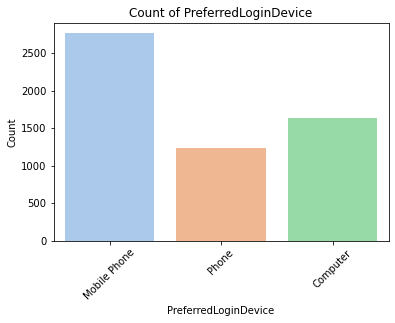

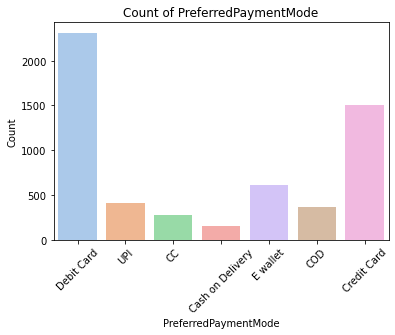

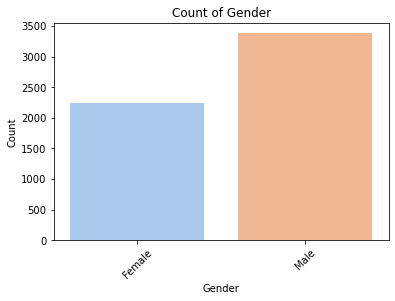

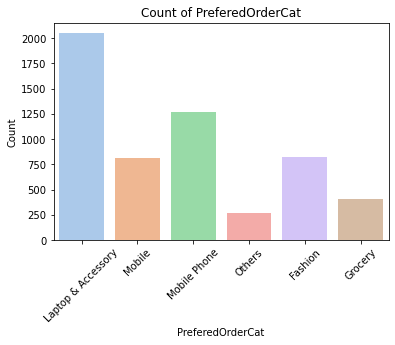

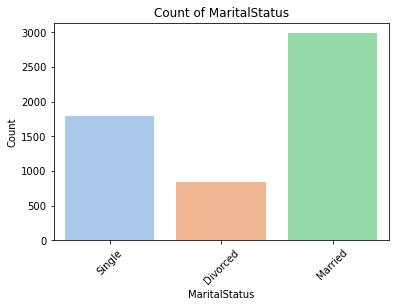

In [10]:
#PLOTTING OF CATEGORICAL
for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=dataset, x=col, palette="pastel")
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


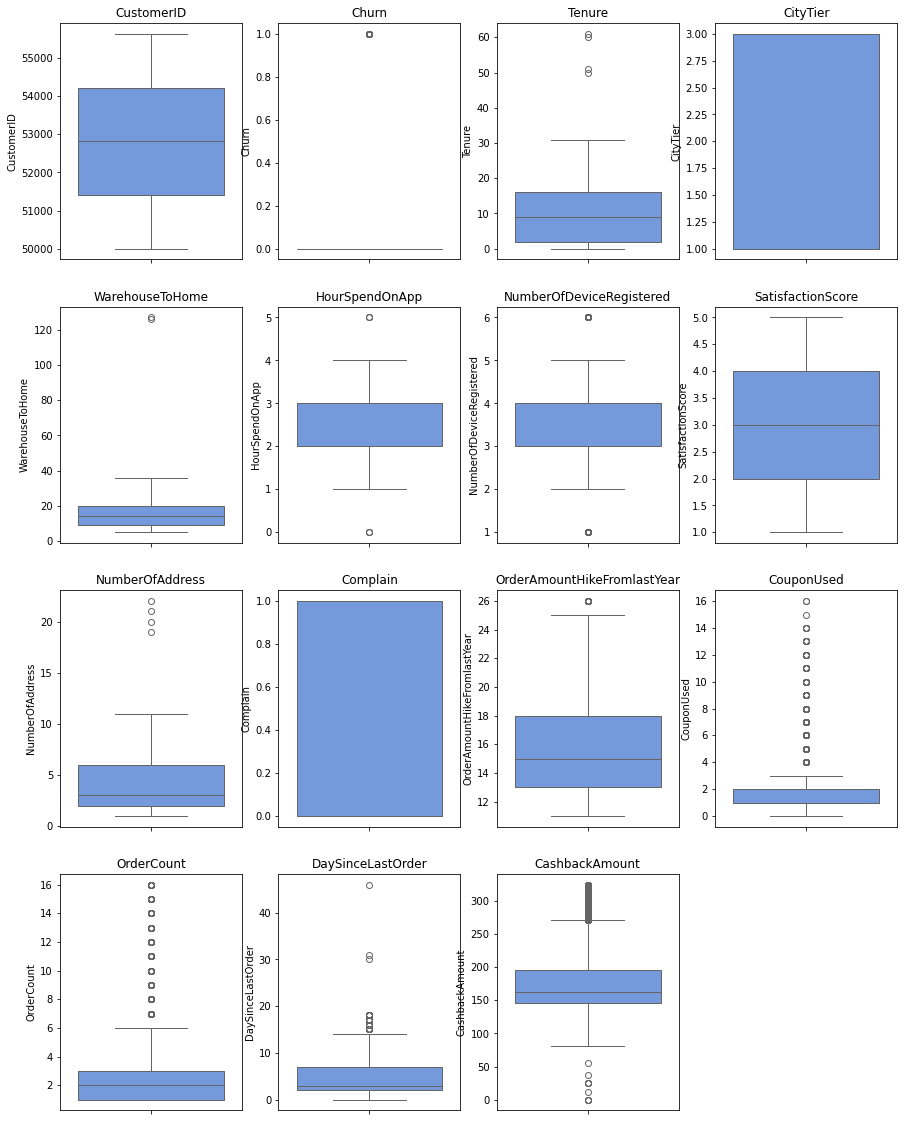

In [11]:
numerical_da = numerical.columns

plt.figure(figsize=(15,20))

# Loop through each numerical column to create a boxplot
for i,col in enumerate(numerical_da):
    plt.subplot(4,4 , i+1) #creating four rows, four columns
    sns.boxplot(y = dataset[col], color="cornflowerblue") # Plotting
    plt.title(col)
#Adjust layout to avaoid overllapping
plt.tight_layout
plt.show()

WarehouseToHome: Most deliveries are made within a certain range, but there are a few outliers where the delivery time was significantly longer.

HourSpendOnApp: Most users spend between 2 and 4 hours on the app, with a few outliers who spend significantly more.

NumberOfDeviceRegistered: Most users have registered a few devices, but a few have registered a large number of devices.

SatisfactionScore: Most users have a satisfaction score between 3 and 4, with a few outliers who have very low or very high satisfaction scores.
By analyzing these box plots, you can gain insights into the distribution of different variables and identify potential outliers or unusual patterns.

Text(0.5, 1.0, 'Correlation Heatmap')

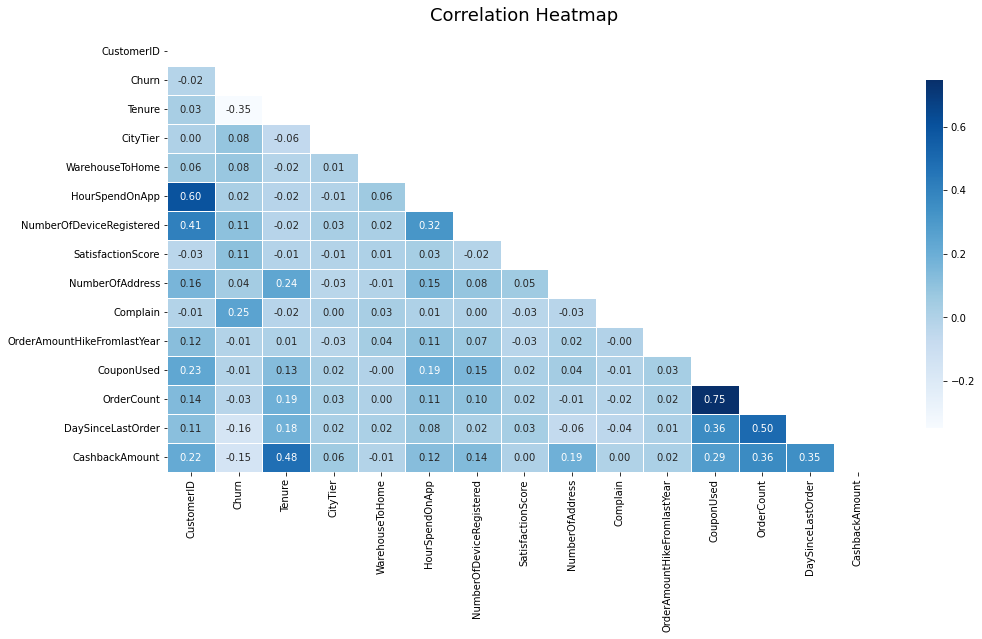

In [12]:
#CORRELATION MATRIX

plt.figure(figsize=(16,8))

#CREATE A MASK FOR DIAGONAL CORRELATION PLOT
mask = np.triu(np.ones_like(numerical.corr(), dtype=np.bool))
# PLOT THE HEATMAP
heatmap = sns.heatmap(
    numerical.corr(),
    mask=mask,
    annot=True,
    cmap="Blues",
    fmt=".2f",  # Format to 2 decimal places
    linewidths=0.5,  # Add gridlines for clarity
    cbar_kws={"shrink": 0.8}  # Shrink colorbar for better fit
)

# SET TITLE FOR THE HEATMAP
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 18}, pad=16)

## CORRELATION BETWEEN TARGETS AND FIGURES

<AxesSubplot:xlabel='PreferredLoginDevice', ylabel='CustomerID'>

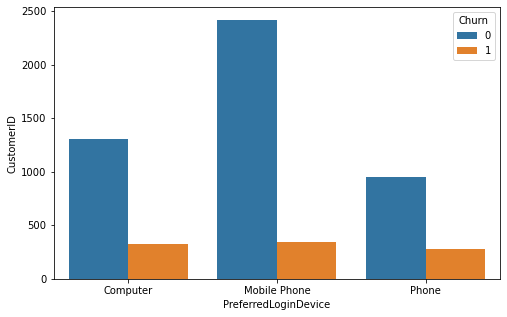

In [13]:
plt.figure(figsize=(8,5))
dataset1 = dataset.groupby(["PreferredLoginDevice", "Churn"]).agg({"CustomerID": "nunique"}).reset_index()
sns.barplot(data = dataset1, x="PreferredLoginDevice", y="CustomerID", hue="Churn")

<AxesSubplot:xlabel='PreferredPaymentMode', ylabel='CustomerID'>

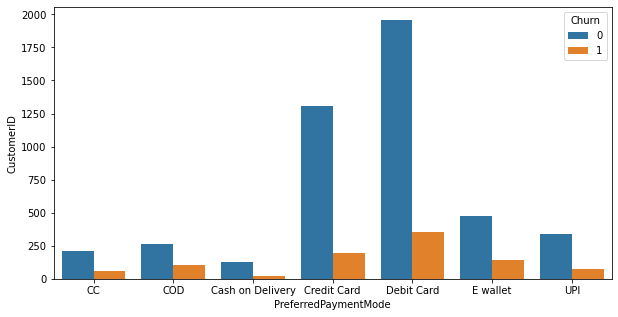

In [14]:
plt.figure(figsize=(10,5))
dataset2 = dataset.groupby(["PreferredPaymentMode", "Churn"]).agg({"CustomerID":"nunique"}).reset_index()
sns.barplot(data=dataset2, x = "PreferredPaymentMode", y="CustomerID", hue="Churn")

<AxesSubplot:xlabel='Gender', ylabel='CustomerID'>

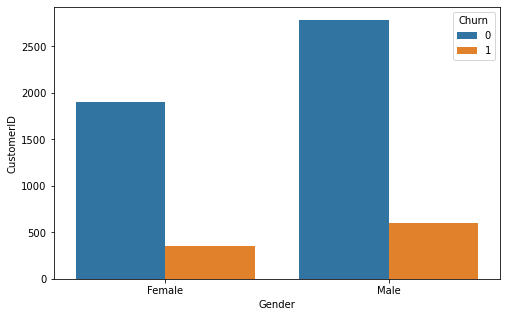

In [15]:
plt.figure(figsize=(8,5))

dataset3 = dataset.groupby(["Gender", "Churn"]).agg({"CustomerID":"nunique"}).reset_index()
sns.barplot(data=dataset3, x='Gender', y='CustomerID', hue="Churn")

<AxesSubplot:xlabel='PreferedOrderCat', ylabel='CustomerID'>

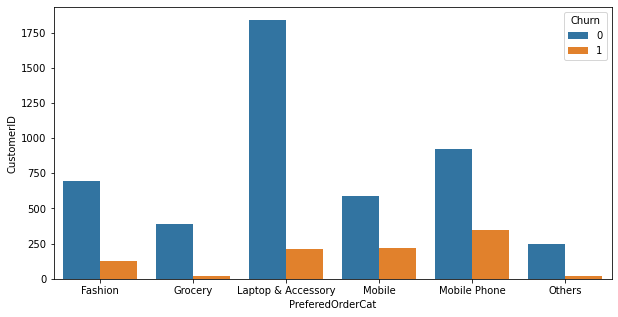

In [16]:
plt.figure(figsize=(10, 5))
dataset4 = dataset.groupby(["PreferedOrderCat", "Churn"]).agg({"CustomerID":"nunique"}).reset_index()
sns.barplot(data=dataset4, x="PreferedOrderCat", y="CustomerID", hue="Churn")

<AxesSubplot:xlabel='MaritalStatus', ylabel='CustomerID'>

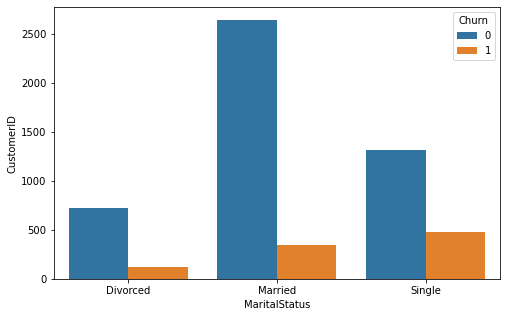

In [17]:
plt.figure(figsize=(8, 5))
dataset4 = dataset.groupby(["MaritalStatus", "Churn"]).agg({"CustomerID":"nunique"}).reset_index()
sns.barplot(data=dataset4, x="MaritalStatus", y="CustomerID", hue="Churn")

In [18]:
# import pandas as pd

# # Load the data
# data = pd.read_csv("Copy of Shaq Express - September Pemier Base .csv")

# # Trim leading and trailing whitespaces in string columns
# data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# # Convert the DataFrame to JSON
# # Use the "records" orient for a readable format
# json_data = data.to_json(orient="records", lines=False)

# # Save JSON to a file
# with open("shaq_premier2.json", "w") as file:
#     file.write(json_data)

# # Print the JSON output
# print(json_data)


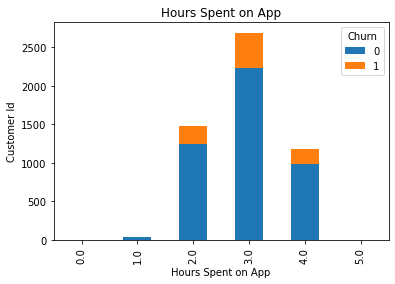

In [19]:
#HOURS SPENT AND CHURN

hours = pd.crosstab(dataset["HourSpendOnApp"], dataset["Churn"])
hours.plot(kind="bar", stacked=True, title="Hours Spent on App")
plt.xlabel("Hours Spent on App")
plt.ylabel("Customer Id")
plt.show()

In [20]:
#COUNTING ACCORDING TO HOURS SPENT AND CHURN

data1 = dataset.groupby(["HourSpendOnApp", "Churn"]).agg({"CustomerID":"nunique"}).reset_index()

data1

,HourSpendOnApp,Churn,CustomerID
0,0.0,0,3
1,1.0,0,35
2,2.0,0,1239
3,2.0,1,232
4,3.0,0,2227
5,3.0,1,460
6,4.0,0,978
7,4.0,1,198
8,5.0,0,3


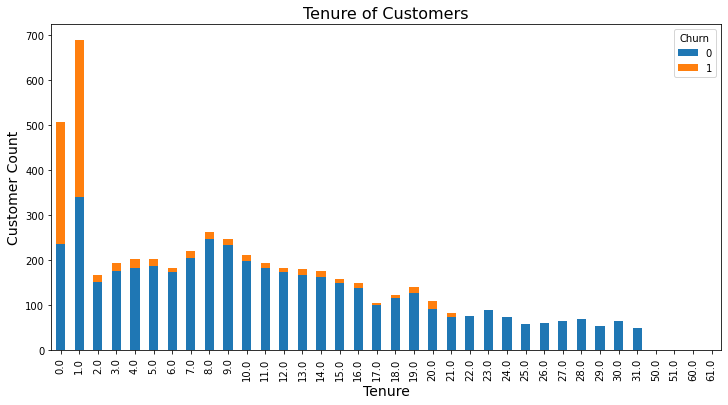

In [21]:
# Create the crosstab
tenure = pd.crosstab(dataset["Tenure"], dataset["Churn"])

# Create the figure and axes, and set the figure size
fig, ax = plt.subplots(figsize=(12, 6)) 
# Plot the data using Matplotlib
tenure.plot(kind="bar", stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel("Tenure", fontsize=14)
ax.set_ylabel("Customer Count", fontsize=14)
ax.set_title("Tenure of Customers", fontsize=16)

# Show the plot
plt.show()


In [22]:
#COUNT OF CUSTOMER TENURE

data2 = dataset.groupby(["Tenure", "Churn"]).agg({"CustomerID":"nunique"}).reset_index()


In [23]:
#ORDER CATEGORY

data3 = dataset.groupby(["PreferedOrderCat", "Churn"]).agg({"CustomerID": "nunique"}).reset_index()
data3

,PreferedOrderCat,Churn,CustomerID
0,Fashion,0,698
1,Fashion,1,128
2,Grocery,0,390
3,Grocery,1,20
4,Laptop & Accessory,0,1840
5,Laptop & Accessory,1,210
6,Mobile,0,589
7,Mobile,1,220
8,Mobile Phone,0,921
9,Mobile Phone,1,350


In [24]:
data4 = dataset.groupby(["Complain", "Churn"]).agg({"CustomerID": "nunique"}).reset_index()

data4

,Complain,Churn,CustomerID
0,0,0,3586
1,0,1,440
2,1,0,1096
3,1,1,508


### IMPUTING NULL VALUES

In [25]:
# #IMPUTTING MISSING VALUES


# # Separate numerical and categorical columns
# numerical_columns = dataset.select_dtypes(include=['int', 'float']).columns
# categorical_columns = dataset.select_dtypes(include=['object']).columns

# # Fill missing values
# dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].mean())
# dataset[categorical_columns] = dataset[categorical_columns].fillna(dataset[categorical_columns].mode().iloc[0])


# x = dataset.drop(columns = ["CustomerID", "Churn"])
# y  = dataset["Churn"]

# #Training the dataset
# x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.02, random_state=42)

# #converting categorical into numerical
# encoder = OneHotEncoder()

# X_train = encoder.fit_transform(x_train[categorical_columns]).toarray()
# X_test =  encoder.fit_transform(x_test[categorical_columns]).toarray()


# x_train_final = pd.concat([x_train[numerical_columns].reset_index(drop=True), X_train.reset_index(drop=True)], axis=1)
# x_test_final = pd.concat([x_test[numerical_columns].reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

# x_train_final

### PREPROCESSING USING PIPELINE

#### SimpleImputer, StandardScaler and OneHotEncoding

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming `dataset` is already loaded.
x = dataset.drop(columns=["CustomerID", "Churn"])
y = dataset["Churn"]

#GROUPING INTO DATA TYPES
numerical_columns = x.select_dtypes(include=["int64", "float"]).columns
categorical_columns = x.select_dtypes(include=["object"]).columns

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# NUMERICAL PREPROCESSING
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# CATEGORICAL PREPROCESSING
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_columns),
    ("cat", categorical_transformer, categorical_columns)
])



### RANDOM FOREST CLASSIFIER

In [27]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Bundle preprocessing and model into a pipeline
my_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

# Fit the model
my_pipeline.fit(x_train, y_train)

# Get predictions for the test set
preds = my_pipeline.predict(x_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('MAE:', score)

print("Classification Report:")
print(" ")
print(classification_report(y_test, preds))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds))

MAE: 0.02930728241563055
Classification Report:
 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       0.99      0.83      0.90       185

    accuracy                           0.97      1126
   macro avg       0.98      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126


Confusion Matrix:
[[940   1]
 [ 32 153]]


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the regression model
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 0.03
Mean Absolute Error (MAE): 0.03
R-squared (R²): 0.79


### DECISION TREE

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model
model1 = DecisionTreeClassifier(random_state=42)

# Create the pipeline with the preprocessor and the model
my_pipeline1 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Note the use of a tuple here
    ("model1", model1)                # Specify model1 for Decision Tree
])

# Fit the model
my_pipeline1.fit(x_train, y_train)

# Get predictions for the test set
preds1 = my_pipeline1.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, preds1)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, preds1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds1))


Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       941
           1       0.94      0.91      0.93       185

    accuracy                           0.98      1126
   macro avg       0.96      0.95      0.96      1126
weighted avg       0.98      0.98      0.98      1126


Confusion Matrix:
[[930  11]
 [ 16 169]]


### LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(max_iter=1000,random_state=42)

my_pipeline2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model2", model2)
])

my_pipeline2.fit(x_train, y_train)


preds2 = my_pipeline2.predict(x_test)

accuracy = accuracy_score(y_test, preds2)

print(f"Accuracy: {accuracy:2f}")

print("\nClassification Report:")
print(classification_report(y_test, preds2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds2))

Accuracy: 0.915631

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       941
           1       0.87      0.57      0.69       185

    accuracy                           0.92      1126
   macro avg       0.90      0.78      0.82      1126
weighted avg       0.91      0.92      0.91      1126


Confusion Matrix:
[[925  16]
 [ 79 106]]


### XGBoost

In [66]:
from xgboost import XGBClassifier

# Define the XGBoost model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Create the pipeline with the preprocessor and the model
my_pipeline_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Preprocessor for numerical and categorical data
    ("model3", model_xgb)             # XGBoost Classifier
])

# Fit the model
my_pipeline_xgb.fit(x_train, y_train)

# Get predictions for the test set
preds_xgb = my_pipeline_xgb.predict(x_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, preds_xgb)
print(f'Accuracy: {accuracy_xgb:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, preds_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds_xgb))


Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       941
           1       0.96      0.90      0.93       185

    accuracy                           0.98      1126
   macro avg       0.97      0.95      0.96      1126
weighted avg       0.98      0.98      0.98      1126


Confusion Matrix:
[[934   7]
 [ 18 167]]


In [40]:
#MODEL SUMMARY

print("""Random Forest Classifier's accuracy: 0.97
Decision Tree's accuracy: 0.97
Logistic Regression's accuracy: 0.92
XBGoost's accuracy: 0.98""")

Random Forest Classifier's accuracy: 0.97
Decision Tree's accuracy: 0.97
Logistic Regression's accuracy: 0.92
XBGoost's accuracy: 0.98


### PERFORMING CROSS_VALIDATION ON THE DATA MODELS

In [34]:
#For Random Forest Classifier

from sklearn.model_selection import cross_val_score,KFold

K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

scores = cross_val_score(my_pipeline, x,y, cv=kf)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.01


In [62]:
#For Decision Tree

scores1 = cross_val_score(my_pipeline1, x,y, cv=kf)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

0.96 accuracy with a standard deviation of 0.01


In [43]:
#For Logistic Regression

In [68]:
scores2 = cross_val_score(my_pipeline2, x,y, cv=kf)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.89 accuracy with a standard deviation of 0.01


In [67]:
scores3 = cross_val_score(my_pipeline_xgb, x,y, cv=kf)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

0.97 accuracy with a standard deviation of 0.01


In [46]:
print("""
Random Forest Classifier's accuracy: 0.97 vs cross_validation prediction: 0.96
Decision Tree's accuracy: 0.97 vs cross_validation prediction: 0.96
Logistic Regression's accuracy: 0.92 vs cross_validation prediction: 0.89
XBGoost's accuracy: 0.98 vs cross_validation prediction: 0.97
""")


Random Forest Classifier's accuracy: 0.97 vs cross_validation prediction: 0.96
Decision Tree's accuracy: 0.97 vs cross_validation prediction: 0.96
Logistic Regression's accuracy: 0.92 vs cross_validation prediction: 0.89
XBGoost's accuracy: 0.98 vs cross_validation prediction: 0.97



### Hyperparameter Tuning

In [48]:
#Random ForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Random Forest
param_grid_rf = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 5],
    "model__max_features": ["sqrt", "log2"]
}

# Define pipeline with Random Forest
# pipeline_rf = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("model", RandomForestClassifier(random_state=42))
# ])

# Perform GridSearchCV
grid_search_rf = GridSearchCV(my_pipeline, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Results
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_search_rf.best_score_)


Best Parameters for Random Forest: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best Accuracy for Random Forest: 0.9522666173387595


In [65]:
# Define hyperparameters for Decision Tree


param_grid_dt = {
    "model1__max_depth": [5, 10, 20, None],
    "model1__min_samples_split": [2, 10, 20],
    "model1__min_samples_leaf": [1, 5, 10],
    "model1__criterion": ["gini", "entropy"]
}

# Define pipeline with Decision Tree
# pipeline_dt = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("model", DecisionTreeClassifier(random_state=42))
# ])

# Perform GridSearchCV
grid_search_dt = GridSearchCV(my_pipeline1, param_grid_dt, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_dt.fit(x_train, y_train)

# Results
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy for Decision Tree:", grid_search_dt.best_score_)


Best Parameters for Decision Tree: {'model1__criterion': 'entropy', 'model1__max_depth': 20, 'model1__min_samples_leaf': 1, 'model1__min_samples_split': 2}
Best Accuracy for Decision Tree: 0.9402747564434579


In [58]:
# Define hyperparameters for Logistic Regression

param_grid_lr = {
    "model2__C": [0.1, 1, 10],
    "model2__solver": ["liblinear", "lbfgs"],
    "model2__penalty": ["l2"]
}

# Define pipeline with Logistic Regression
# pipeline_lr = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("model", LogisticRegression(max_iter=1000, random_state=42))
# ])

# Perform GridSearchCV
grid_search_lr = GridSearchCV(my_pipeline2, param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_lr.fit(x_train, y_train)

# Results
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Accuracy for Logistic Regression:", grid_search_lr.best_score_)


Best Parameters for Logistic Regression: {'model2__C': 10, 'model2__penalty': 'l2', 'model2__solver': 'liblinear'}
Best Accuracy for Logistic Regression: 0.883659884079418


In [69]:
# Define hyperparameters for XGBoost

param_grid_xgb = {
    "model3__n_estimators": [50, 100, 200],
    "model3__learning_rate": [0.01, 0.1, 0.2],
    "model3__max_depth": [3, 5, 10],
    "model3__subsample": [0.5, 0.8, 1.0],
    "model3__colsample_bytree": [0.5, 0.8, 1.0]
}

# Define pipeline with XGBoost
# pipeline_xgb = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("model", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
# ])

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(my_pipeline_xgb, param_grid_xgb, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# Results
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Accuracy for XGBoost:", grid_search_xgb.best_score_)


Best Parameters for XGBoost: {'model3__colsample_bytree': 0.8, 'model3__learning_rate': 0.1, 'model3__max_depth': 10, 'model3__n_estimators': 200, 'model3__subsample': 1.0}
Best Accuracy for XGBoost: 0.9618145270686892


In [70]:
print("""
Random Forest Classifier's accuracy: 0.97 vs cross_validation prediction: 0.96 and tuning:95 

Decision Tree's accuracy: 0.97 vs cross_validation prediction: 0.96 and Tuning: 94

Logistic Regression's accuracy: 0.92 vs cross_validation prediction: 0.89 and Tuning: 88

XBGoost's accuracy: 0.98 vs cross_validation prediction: 0.97 and Tuning: 96
""")


Random Forest Classifier's accuracy: 0.97 vs cross_validation prediction: 0.96 and tuning:95 

Decision Tree's accuracy: 0.97 vs cross_validation prediction: 0.96 and Tuning: 94

Logistic Regression's accuracy: 0.92 vs cross_validation prediction: 0.89 and Tuning: 88

XBGoost's accuracy: 0.98 vs cross_validation prediction: 0.97 and Tuning: 96



## E-Commerce Churn Prediction: A Deep Dive Project

### Objective

This project aimed to predict e-commerce customer churn by analyzing key factors such as complaints, satisfaction scores, the number of devices registered, hours spent on the app, warehouse-to-home distance, and city tier. These factors, identified through a heatmap, showed the highest positive correlation with churn.

### Motivation
I completed this project over five days, using it as an opportunity to deepen my understanding of machine learning concepts I had previously applied without fully grasping their underlying mechanisms. I extensively read resources from:
Scikit-learn documentation,
FreeCodeCamp,
DataCamp,
GeeksforGeeks,
Stack Overflow, and
ChatGPT,
The project was not only a technical challenge but also an excellent learning experience.

### Key Challenges and Solutions

#### Preprocessing the Data

Challenges: This was my first time implementing pipelines, which initially felt overwhelming. I decided to use them after learning about their benefits in a Kaggle intermediate course.

Solution:

Used StandardScaler to scale numerical variables.
Applied SimpleImputer to handle missing values: replacing numerical nulls with the mean and categorical nulls with the mode.
Utilized OneHotEncoder to transform categorical variables into numerical format.
Learning Outcome: Pipelines ensured that preprocessing steps were automated and consistent across the training and testing datasets.

Cross-Validation

Challenges: Understanding and implementing cross-validation took considerable effort.

Solution:

Applied 5-fold cross-validation to divide the dataset into five parts. Each fold reserved one part for testing while training on the remaining four, iterating across all folds.

Benefits: Cross-validation reduced overfitting, ensuring the model performed better on unseen data. 
Overfitting occurs when a model learns the training data too well, leading to poor generalization.

Hyperparameter Tuning

Challenges: This was the most difficult part of the project and took two days to understand fully. Hyperparameters are not learned by the model but are external parameters that must be manually tuned to optimize performance.

Solution:

Used GridSearchCV for hyperparameter tuning instead of RandomizedSearchCV due to its suitability for structured datasets. GridSearch systematically searched the parameter grid to find the best model configuration.
Learning Outcome: While hyperparameter tuning remains a complex topic, I now understand its role in enhancing model performance and plan to explore it further.

Models and Results

After preprocessing, cross-validation, and hyperparameter tuning, the following models achieved the best results:

XGBoost Classifier: Achieved an accuracy of 96%.

Random Forest Classifier: Achieved an accuracy of 95%.

These results demonstrated the models' ability to accurately predict churn based on the identified features.

### Key Learnings

Documentation and Practice: Reading official documentation and experimenting with code was crucial for understanding concepts like pipelines, cross-validation, and hyperparameter tuning.

Pipelines: Automating preprocessing steps streamlined the workflow and reduced the chances of data leakage.

Cross-Validation: This technique was instrumental in ensuring that the models generalized well to unseen data.

Hyperparameter Tuning: Although challenging, it significantly improved model performance and helped me appreciate the importance of parameter optimization.

Conclusion

This project has been a blend of fun, challenges, and learning. It allowed me to strengthen my grasp of essential machine learning concepts and techniques. While I am proud of my progress, I recognize there is more to learn—especially in hyperparameter tuning and advanced model evaluation.

I plan to continue building projects that challenge me to explore new concepts and refine my skills.

